In [131]:
import os
while not (os.getcwd().split('\\')[-1] == 'ecological-networks' or os.getcwd().split('/')[-1] == 'ecological-networks'):
    %cd ..
import setup_paths
setup_paths.add_path()
from Species_Reintroductions import *
global DATA_TYPE
DATA_TYPE = 'Real_1D'
CASE_TO_SOLVE_init(DATA_TYPE)
get_CASE()

def CASE_init(CASE_TO_SOLVE):
    DATA_TYPE = CASE_TO_SOLVE
    CASE_TO_SOLVE_init(DATA_TYPE)
    NetworkName_Solved_df = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"Network_Solved_{DATA_TYPE.split('_')[0]}.pkl"))
    M = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"M_{DATA_TYPE.split('_')[0]}.pkl"))
    if DATA_TYPE.split('_')[0] == 'Syn':
        M = {k:M[k] for k in M.keys() if int(k.split('_')[2]) == 100}
    return DATA_TYPE, NetworkName_Solved_df, M

from scipy.optimize import fsolve
from scipy import stats
import scipy.linalg as la
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing


Real_1D


In [164]:
def get_Imp_DF(CASE_TO_SOLVE, loc):
    DATA_TYPE, _, M = CASE_init(CASE_TO_SOLVE)
    #loc = '04'
    if DATA_TYPE.split('_')[1] == '1D':
        approach_lst = ['three','four','five','six','rand']
    elif DATA_TYPE.split('_')[1] == '2D':
        approach_lst = ['four','five','six','rand']

    Data = {}
    for NetworkName in itertools.islice(M.keys(),0,None,1):
        #print(NetworkName)
        DF = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '05_Analysis', 'Dyna_SR_Imp', f"{loc}", f"{NetworkName}.pkl"))
        DF.columns.values[np.where(np.array(DF.columns) == 'N1')[0][-1]] = 'P1'
        DF.columns.values[np.where(np.array(DF.columns) == 'N0')[0][-1]] = 'P0'
        #DF.drop(['N1','X_ob1', 'ST1'], axis = 'columns', inplace = True)
        DF.drop(['X_ob1'], axis = 'columns', inplace = True)
        DF.drop(['X_ob0'], axis = 'columns', inplace = True)
        #DF.drop(['N0','X_ob0', 'ST0'], axis = 'columns', inplace = True)
        DF.drop(['beta_eff_p0','beta_eff_a0'], axis = 'columns', inplace = True)
        DF.drop(['beta_eff_p1','beta_eff_a1'], axis = 'columns', inplace = True)
        DF = DF.dropna()
        Data[NetworkName] = DF
    del DF, NetworkName

    for NetworkName in itertools.islice(list(Data.keys()),0,None,1):
        
        DF = pd.DataFrame([], columns = ['Approach','Key0','Key1','Key2'] + list(Data[NetworkName].columns[5:]))
        for approach in approach_lst:
            for key in set(list(itertools.product(*[[0,1,2], [2,5,8], [0]]))):
                try:
                    DF_Slice = Data[NetworkName].copy()
                    
                    DF_Slice = DF_Slice[ (DF_Slice['Approach'] == approach) & (DF_Slice['Key0'] == key[0]) & (DF_Slice['Key1'] == key[1]) & (DF_Slice['Key2'] == key[2])]
                    X = np.array(DF_Slice)[:,5:]
                    Y = list(np.mean(X, axis = 0))
                    Y = [approach, key[0], key[1], key[2]] + Y
                    DF = DF.append(pd.Series(Y, index = DF.columns), ignore_index=True)
                except:
                    print(NetworkName, approach, key)
                    Y = [approach, key[0], key[1], key[2]] + [np.nan for i in range(len(DF.columns)-4)]
                    DF = DF.append(pd.Series(Y, index = DF.columns), ignore_index=True)
        DF.sort_values(by = ['Key0','Key1','Key2'], ascending = True, inplace = True)
        Data[NetworkName] = DF
    del NetworkName, approach, key, DF_Slice, X, Y, DF
    return Data

for CASE_TO_SOLVE, loc in zip(['Real_1D', 'Syn_1D', 'Real_2D', 'Syn_2D'],['01','02','04','03']):
    DATA_TYPE = CASE_TO_SOLVE
    CASE_TO_SOLVE_init(CASE_TO_SOLVE)
    Data = get_Imp_DF(CASE_TO_SOLVE, loc)
    print(CASE_TO_SOLVE)


Real_1D
Syn_1D
Real_2D
Syn_2D


In [84]:
DF_Slice = Data['M_PL_014'].copy()
approach = 'three'
key = (1,8,0)
DF_Slice = DF_Slice[ (DF_Slice['Approach'] == approach) & (DF_Slice['Key0'] == key[0]) & (DF_Slice['Key1'] == key[1]) & (DF_Slice['Key2'] == key[2])]
DF_Slice

DF_Slice = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '05_Analysis', 'Dyna_SR_Imp', f"{loc}", f"M_PL_014.pkl"))
DF_Slice = DF_Slice[ (DF_Slice['Approach'] == approach) & (DF_Slice['Key0'] == key[0]) & (DF_Slice['Key1'] == key[1]) & (DF_Slice['Key2'] == key[2])]
DF_Slice.isna().sum()
#DF_Slice[['beta_eff_p1','beta_eff_a1']]
#np.array(DF_Slice)[:,5:]
#Y = list(np.mean(X, axis = 0))


,beta_eff_p1,beta_eff_a1
100,NaN,NaN
101,1.565507,NaN
102,1.265844,NaN
103,1.252964,NaN
104,NaN,NaN
105,NaN,1.079143
106,NaN,NaN
107,NaN,NaN
108,NaN,NaN
109,NaN,1.059618


,S0,A0,C0,N0,X0,ST0,P0,g_p0,g_a0,S1,A1,C1,N1,X1,ST1,P1,g_p1,g_a1
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.0,36.000000,36.000000
mean,0.209402,0.683258,0.622844,0.621576,0.353942,0.0,0.0,0.644104,0.573828,0.370019,0.624104,0.566216,0.444057,0.321061,0.0,0.0,0.608494,0.450550
std,0.371927,0.373038,0.292218,0.310798,0.315671,0.0,0.0,0.314664,0.320180,0.381900,0.374157,0.296068,0.277595,0.327723,0.0,0.0,0.315673,0.329266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.000000,0.310212,0.495488,0.415318,0.184974,0.0,0.0,0.445157,0.312137,0.000000,0.226017,0.408891,0.214188,0.110808,0.0,0.0,0.383447,0.170402
50%,0.000000,0.869942,0.718204,0.710816,0.295775,0.0,0.0,0.714750,0.611657,0.234966,0.742168,0.653581,0.455014,0.222612,0.0,0.0,0.665255,0.382549
75%,0.115385,1.000000,0.773243,0.833639,0.345005,0.0,0.0,0.914693,0.844114,0.707125,1.000000,0.706586,0.561223,0.309941,0.0,0.0,0.877957,0.660367
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


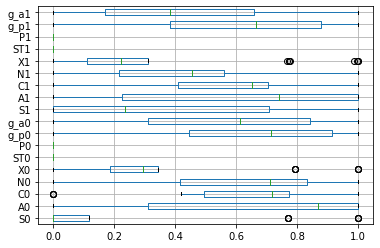

In [165]:
D = Data[np.random.choice(list(Data.keys()))].copy()

#'''
for col in D.columns[4:]:
    try:
        D[col] = preprocessing.MinMaxScaler().fit_transform(np.array(D[col]).reshape(-1,1))
        #pass
    except:
        print(col)
    #D[col] = (D[col].to_numpy() - min(D[col].to_numpy())) / (max(D[col].to_numpy()) - min(D[col].to_numpy()))

D.boxplot(vert = False)
#'''
#D.columns
D.describe()

In [121]:
Data[np.random.choice(list(Data.keys()))].head()

,Approach,Key0,Key1,Key2,S0,A0,C0,N0,X0,ST0,...,g_a0,S1,A1,C1,N1,X1,ST1,N1,g_p1,g_a1
0,four,0,2,0,1.000000,-0.018860,0.000041,0.000024,-0.002128,0.0,...,0.028166,1.011021,0.979384,1.000327,1.000273,0.997263,1.0,1.0,1.000194,1.011062
9,five,0,2,0,1.000000,-0.018860,0.000041,0.000024,-0.002128,0.0,...,0.028166,1.011021,0.979384,1.000327,1.000281,0.997263,1.0,1.0,1.000194,1.011061
18,six,0,2,0,1.000000,-0.018860,0.000041,0.000024,-0.002128,0.0,...,0.028166,1.011021,0.979384,1.000327,1.000272,0.997263,1.0,1.0,1.000194,1.011062
27,rand,0,2,0,1.000000,-0.018860,0.000041,0.000024,-0.002128,0.0,...,0.028166,1.011021,0.979384,1.000325,1.000269,0.997262,1.0,1.0,1.000194,1.011058
5,four,0,5,0,1.047059,-0.030753,-0.000199,-0.000114,-0.000988,0.0,...,0.029701,1.013048,0.974801,0.998789,0.999475,0.998737,1.0,1.0,0.999969,1.013247


In [57]:
print(type(Data))
print(len(Data.keys()))
print(Data.keys())
print(type(Data['M_PL_041']))
print(Data['M_PL_041'].shape)
print(Data['M_PL_041'].columns)
Data['M_PL_041'].head()

<class 'dict'>
30
dict_keys(['M_PL_003', 'M_PL_022', 'M_PL_060_04', 'M_PL_060_07', 'M_PL_060_06', 'M_PL_040', 'M_PL_041', 'M_PL_030', 'M_PL_012', 'M_PL_060_05', 'M_PL_072_04', 'M_PL_023', 'M_PL_072_02', 'M_PL_031', 'M_PL_035', 'M_PL_017', 'M_PL_072_01', 'M_PL_010', 'M_PL_002', 'M_PL_043', 'M_PL_014', 'M_PL_058', 'M_PL_072_03', 'M_PL_019', 'M_PL_009', 'M_PL_018', 'M_PL_034', 'M_PL_026', 'M_PL_029', 'M_PL_028'])
<class 'pandas.core.frame.DataFrame'>
(45, 16)
Index(['Approach', 'Key0', 'Key1', 'Key2', 'S0', 'A0', 'C0', 'X0', 'g_p0',
       'g_a0', 'S1', 'A1', 'C1', 'X1', 'g_p1', 'g_a1'],
      dtype='object')


,Approach,Key0,Key1,Key2,S0,A0,C0,X0,g_p0,g_a0,S1,A1,C1,X1,g_p1,g_a1
0,three,0,2,0,1.633333,-0.034262,-0.001895,0.02849,-0.001414,0.015419,1.025062,0.978326,0.985308,1.004264,0.999721,1.009973
9,four,0,2,0,1.633333,-0.034262,-0.001895,0.02849,-0.001414,0.015419,1.025074,0.978288,0.985282,1.004260,0.999707,1.009980
18,five,0,2,0,1.633333,-0.034262,-0.001895,0.02849,-0.001414,0.015419,1.025074,0.978288,0.985263,1.004257,0.999708,1.009972
27,six,0,2,0,1.633333,-0.034262,-0.001895,0.02849,-0.001414,0.015419,1.025076,0.978279,0.985266,1.004257,0.999707,1.009970
36,rand,0,2,0,1.633333,-0.034262,-0.001895,0.02849,-0.001414,0.015419,1.025042,0.978266,0.985339,1.004227,0.999684,1.009972


In [166]:
def get_Imp_Z(V = 'X1'):
    Z = []
    if DATA_TYPE.split('_')[1] == '1D':
        approach_lst = ['three','four','five','six','rand']
    elif DATA_TYPE.split('_')[1] == '2D':
        approach_lst = ['four','five','six','rand']
    for approach in approach_lst:
        #approach = 'three'
        D = []
        for NetworkName in itertools.islice(list(Data.keys()),0,None,1):
            DF = Data[NetworkName]
            #DF = DF.loc[:,['Approach','Key0','Key1','Key2','X1']]
            row = []
            for key in zip([0,0,0,1,1,1,2,2,2],[2,5,8]*3, [0]*9):
                val = DF[ (DF['Approach'] == approach) & (DF['Key0'] == key[0]) & (DF['Key1'] == key[1]) & (DF['Key2'] == key[2])][V].values[0]
                row += [val]
            D += [row]
        D = np.array(D)
        #print(D)
        del DF, NetworkName,row, val,key,approach
        Z += [np.mean(D, axis = 0)]
    Z = np.array(Z)
    Z = pd.DataFrame(Z, index = approach_lst, columns = [key for key in zip([0,0,0,1,1,1,2,2,2],[2,5,8]*3, [0]*9)])
    return Z

In [167]:
get_Imp_Z(V = 'X1')

,"(0, 2, 0)","(0, 5, 0)","(0, 8, 0)","(1, 2, 0)","(1, 5, 0)","(1, 8, 0)","(2, 2, 0)","(2, 5, 0)","(2, 8, 0)"
four,0.996375,0.997560,1.003589,0.997303,0.998806,1.006387,0.995701,0.996430,1.000512
five,0.996375,0.997559,1.003569,0.997302,0.998804,1.006356,0.995701,0.996429,1.000503
six,0.996375,0.997560,1.003591,0.997303,0.998805,1.006384,0.995701,0.996430,1.000516
rand,0.996374,0.997555,1.003493,0.997302,0.998797,1.006209,0.995701,0.996428,1.000481


In [168]:
get_Imp_Z(V = 'g_p1')

,"(0, 2, 0)","(0, 5, 0)","(0, 8, 0)","(1, 2, 0)","(1, 5, 0)","(1, 8, 0)","(2, 2, 0)","(2, 5, 0)","(2, 8, 0)"
four,0.999918,1.000041,1.000172,1.001788,1.002222,1.003901,0.998511,0.997882,0.996072
five,0.999918,1.000040,1.000169,1.001788,1.002220,1.003891,0.998511,0.997882,0.996077
six,0.999918,1.000040,1.000168,1.001788,1.002221,1.003891,0.998510,0.997882,0.996073
rand,0.999918,1.000040,1.000156,1.001786,1.002214,1.003799,0.998512,0.997887,0.996121


In [169]:
get_Imp_Z(V = 'g_a1')

,"(0, 2, 0)","(0, 5, 0)","(0, 8, 0)","(1, 2, 0)","(1, 5, 0)","(1, 8, 0)","(2, 2, 0)","(2, 5, 0)","(2, 8, 0)"
four,1.009098,1.011457,1.015134,1.011008,1.013216,1.016022,1.007650,1.009469,1.013584
five,1.009098,1.011456,1.015133,1.011008,1.013214,1.016021,1.007650,1.009468,1.013580
six,1.009098,1.011457,1.015129,1.011008,1.013214,1.016019,1.007650,1.009468,1.013578
rand,1.009095,1.011443,1.015093,1.011003,1.013198,1.015980,1.007649,1.009463,1.013555


In [170]:
get_Imp_Z(V = 'A1')

,"(0, 2, 0)","(0, 5, 0)","(0, 8, 0)","(1, 2, 0)","(1, 5, 0)","(1, 8, 0)","(2, 2, 0)","(2, 5, 0)","(2, 8, 0)"
four,0.982459,0.978313,0.971479,0.982458,0.979211,0.977196,0.982444,0.977870,0.966843
five,0.982459,0.978314,0.971472,0.982458,0.979207,0.977115,0.982445,0.977874,0.966869
six,0.982458,0.978312,0.971474,0.982458,0.979207,0.977140,0.982444,0.977870,0.966822
rand,0.982458,0.978312,0.971428,0.982458,0.979209,0.976780,0.982445,0.977872,0.966889


In [174]:
DF_Full = pd.DataFrame([], columns = Data[np.random.choice(list(Data.keys()))].columns)
approach = 'four'
for NetworkName in itertools.islice(list(Data.keys()),0,None,1):
    DF_Slice = Data[NetworkName].copy()
    #DF_Slice = DF_Slice[DF_Slice['Approach'] == approach]
    DF_Full = DF_Full.append(DF_Slice, ignore_index=True)
DF_Full.shape

(972, 22)

In [173]:
D = DF_Full.iloc[:,4:].copy()
for Col_Name in list(D.columns):
    
    X_scaled = preprocessing.MinMaxScaler().fit_transform(np.array(D[Col_Name]).reshape(-1,1))
    D[Col_Name] = X_scaled
del Col_Name, X_scaled
D.corr()

,S0,A0,C0,N0,X0,ST0,P0,g_p0,g_a0,S1,A1,C1,N1,X1,ST1,P1,g_p1,g_a1
S0,1.000000,-0.340262,-0.637601,0.014445,0.861898,NaN,NaN,0.208484,-0.369999,0.888911,-0.065531,-0.771155,-0.035880,0.890577,NaN,NaN,0.262248,0.239895
A0,-0.340262,1.000000,0.672393,0.536309,-0.615483,NaN,NaN,0.363804,-0.346622,-0.356089,0.902988,0.459404,0.220629,-0.552268,NaN,NaN,0.308931,-0.695443
C0,-0.637601,0.672393,1.000000,0.657465,-0.586931,NaN,NaN,0.519484,0.215693,-0.698022,0.535794,0.922620,0.442228,-0.607662,NaN,NaN,0.436673,-0.225221
N0,0.014445,0.536309,0.657465,1.000000,0.045052,NaN,NaN,0.884844,0.146646,0.020855,0.552940,0.513797,0.684840,0.070878,NaN,NaN,0.868360,0.068461
X0,0.861898,-0.615483,-0.586931,0.045052,1.000000,NaN,NaN,0.299232,0.058301,0.847266,-0.407218,-0.577724,0.125593,0.988475,NaN,NaN,0.363785,0.670691
ST0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g_p0,0.208484,0.363804,0.519484,0.884844,0.299232,NaN,NaN,1.000000,0.229672,0.200335,0.408096,0.414328,0.649550,0.313715,NaN,NaN,0.972245,0.285950
g_a0,-0.369999,-0.346622,0.215693,0.146646,0.058301,NaN,NaN,0.229672,1.000000,-0.130464,-0.526338,0.483481,0.321279,0.026542,NaN,NaN,0.235041,0.719275
S1,0.888911,-0.356089,-0.698022,0.020855,0.847266,NaN,NaN,0.200335,-0.130464,1.000000,-0.202865,-0.749687,0.001067,0.894995,NaN,NaN,0.278926,0.404118


<AxesSubplot:>

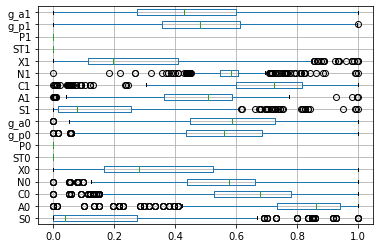

In [179]:
D = DF_Full.iloc[:,4:].copy()
for Col_Name in list(D.columns):
    
    X_scaled = preprocessing.MinMaxScaler().fit_transform(np.array(D[Col_Name]).reshape(-1,1))
    D[Col_Name] = X_scaled
del Col_Name, X_scaled
D.boxplot(vert = False)


In [ ]:
#import seaborn as sns
#D.drop(['ST0', 'ST1', 'P0', 'P1'], axis = 'columns', inplace = True)
#sns.pairplot(D)